In [1]:
import seaborn as sns
import pandas as pd
import missingno as msno
import os
import matplotlib.pyplot as plt
import cv2
import numpy as np

### Original

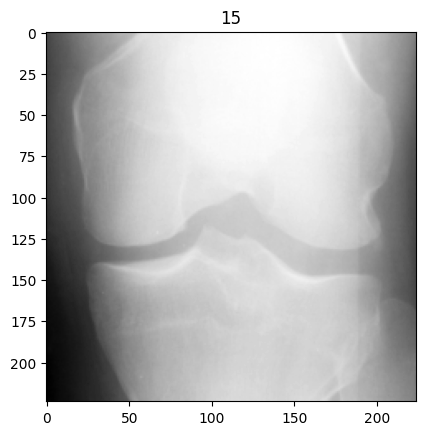

In [2]:
# data 경로 설정
data_dir = '../z20_data/datas/train/0'
categories = ['train','test','val'] # 전처리될 데이터셋을 훈련용, 테스트용, 검증용으로 구분

# 샘플 이미지 시각화
img_name = os.listdir(data_dir)[15]
img_path = os.path.join(data_dir, img_name)
img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
plt.imshow(img, cmap='gray')
plt.title(f'15')
plt.show()

### Clahe(명암)

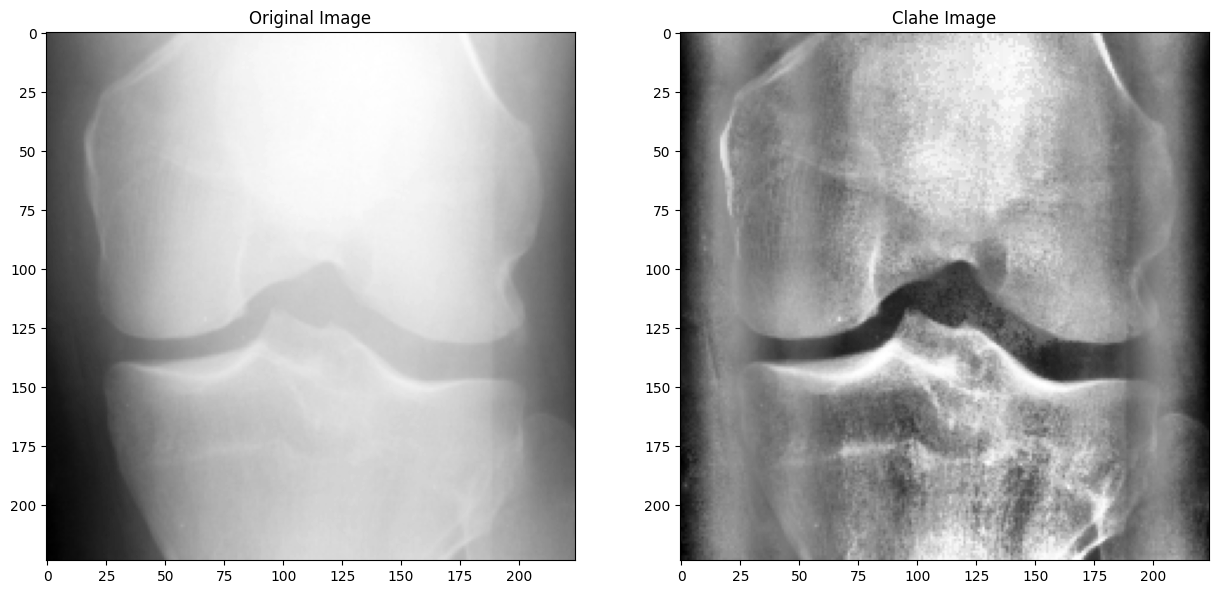

In [3]:
def clahe_img(img):
    clahe = cv2.createCLAHE(clipLimit=20, tileGridSize=(8,8))
    cl_img = clahe.apply(img)
    return cl_img
    

plt.figure(figsize=(15, 10))
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')


plt.subplot(1, 2, 2)
plt.imshow(clahe_img(img), cmap='gray')
plt.title('Clahe Image')
plt.show()

### Denoise(노이즈 제거)

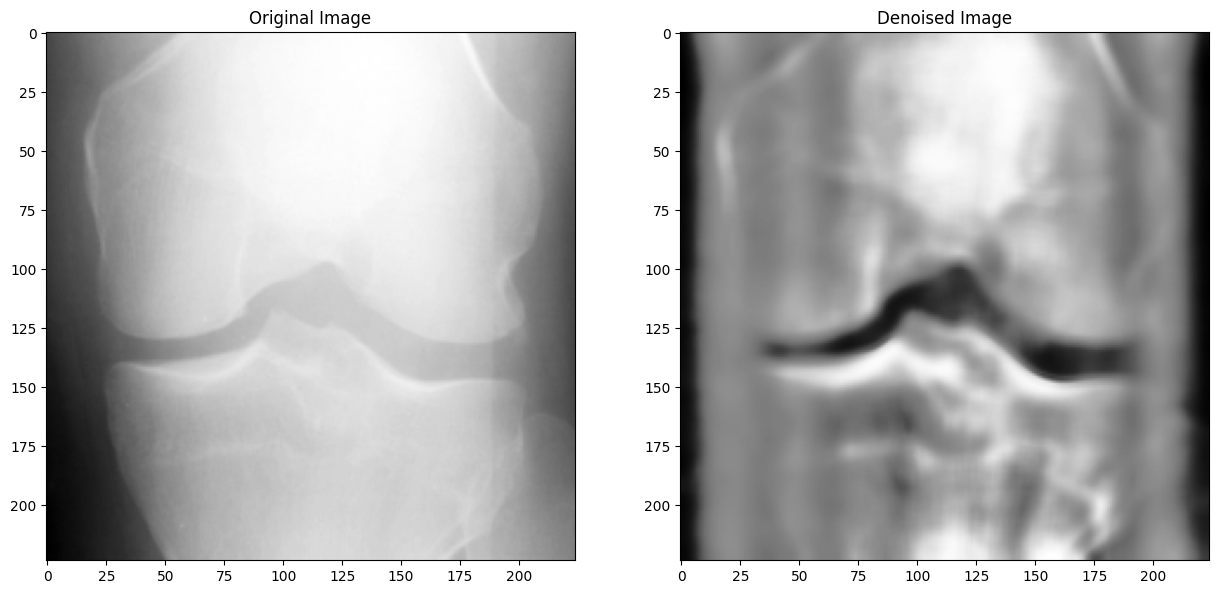

In [4]:
def denoise_img(img):
    return cv2.fastNlMeansDenoising(img, None, 30, 7, 210)

denoised_img = denoise_img(clahe_img(img))

plt.figure(figsize=(15, 10))
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(denoised_img, cmap='gray')
plt.title('Denoised Image')
plt.show()

### Edge(외곽선 그리기)
- original img vs. denoised img

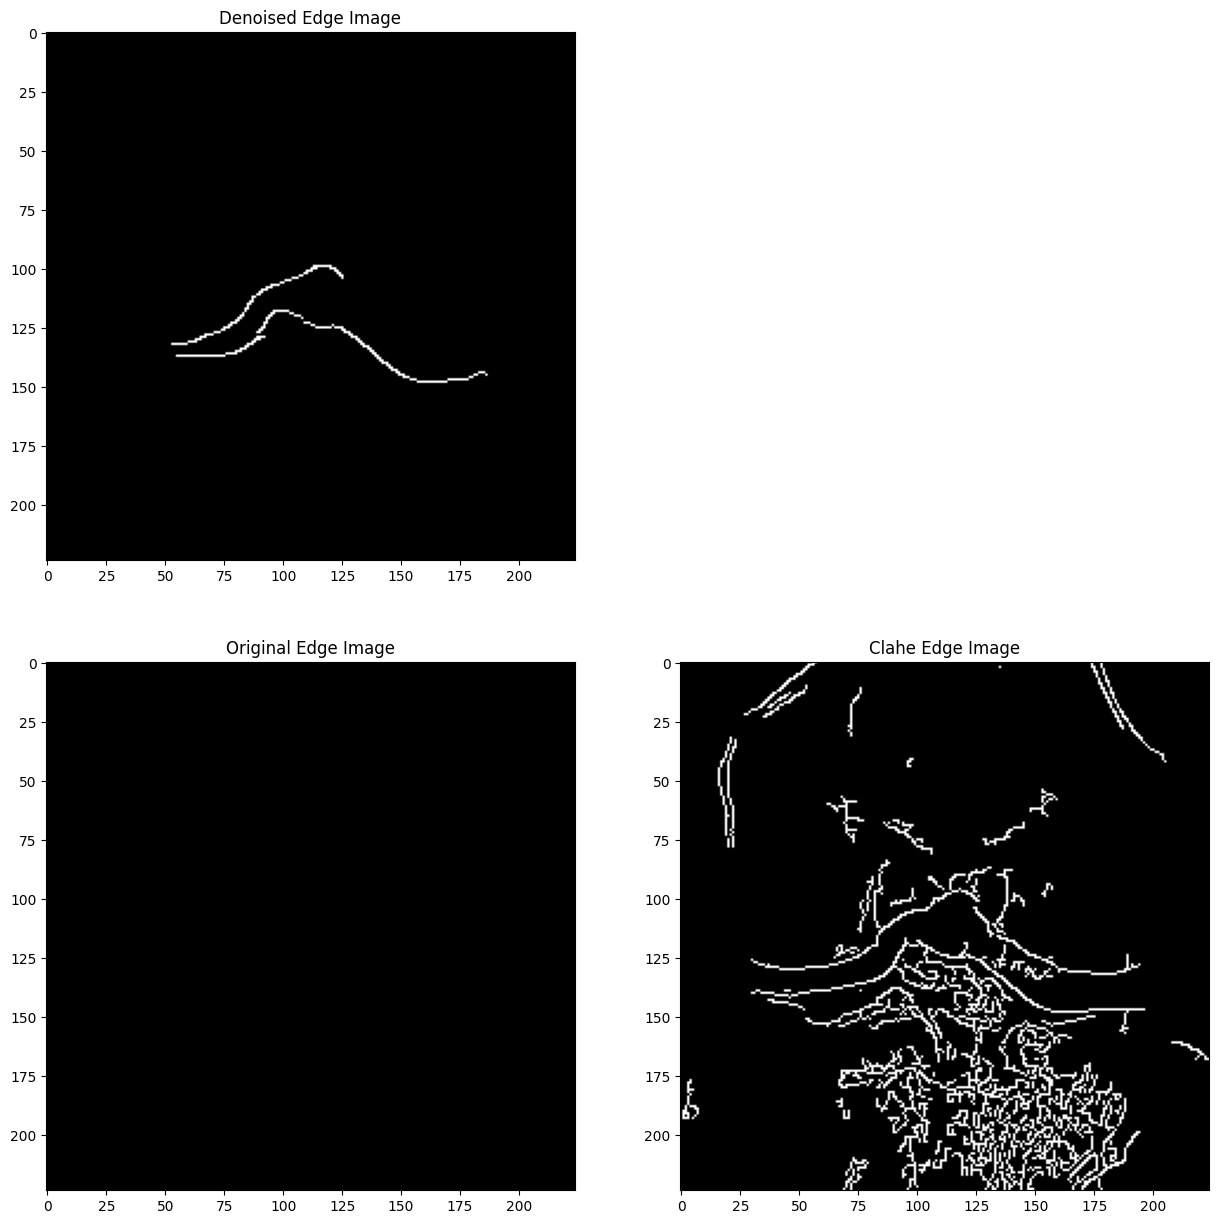

In [5]:
def detect_edge(img):
    return cv2.Canny(img, 100, 200)  # 값을 조절해주면 선을 그리는 범위가 달라짐

orginal_edge_img = detect_edge(img)
clahe_edge_img = detect_edge(clahe_img(img))
denoised_edge_img = detect_edge(denoised_img)

plt.figure(figsize=(15, 30))
plt.subplot(1, 2, 1)
plt.imshow(orginal_edge_img, cmap='gray')
plt.title('Original Edge Image')

plt.subplot(1, 2, 2)
plt.imshow(clahe_edge_img, cmap='gray')
plt.title('Clahe Edge Image')

plt.subplot(2, 2, 1)
plt.imshow(denoised_edge_img, cmap='gray')
plt.title('Denoised Edge Image')


plt.show()

### Clahe(명암) -> Contour

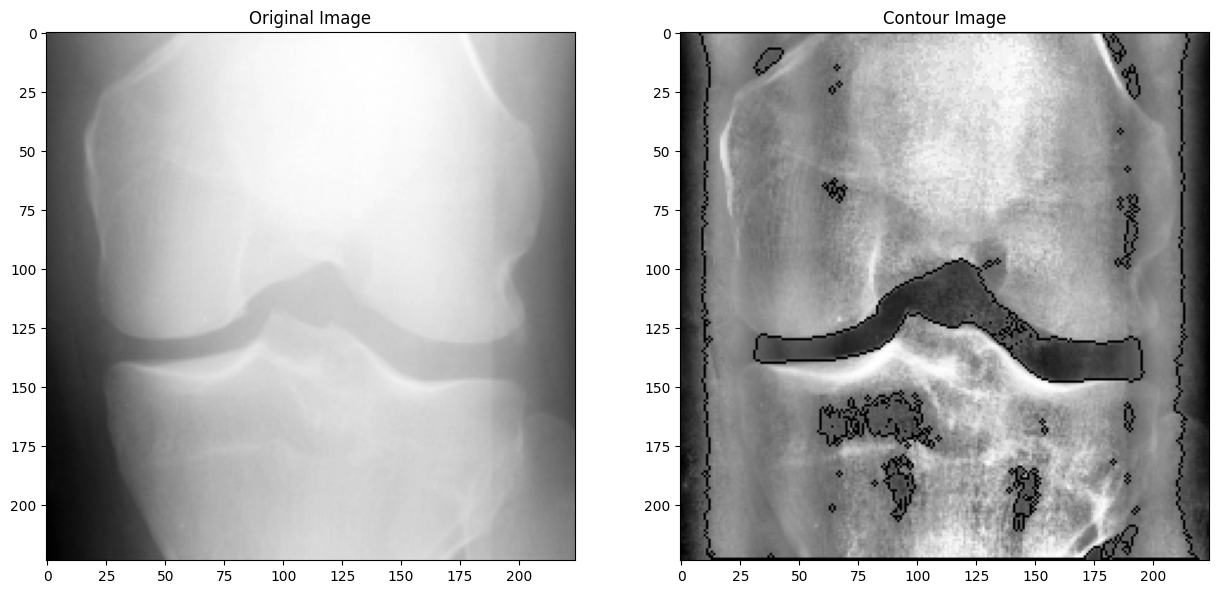

In [6]:
def find_contour(img):
    ret, thresh = cv2.threshold(img, 100, 255, 0)
    contours, hiearchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    return contours

contours = find_contour(clahe_img(img))
contour_img = cv2.drawContours(clahe_img(img), contours, -1, (0,255,0), 1)

plt.figure(figsize=(15, 10))
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(contour_img, cmap='gray')
plt.title('Contour Image')
plt.show()